In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve)


In [30]:
df = pd.read_csv("mental_health_workplace_survey.csv")
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.fillna(df_encoded.mean(numeric_only=True), inplace=True)


In [31]:
X = df_encoded.drop("BurnoutRisk", axis=1)
y = df_encoded["BurnoutRisk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]

print('logistic Regression')
print('Accuracy:', accuracy_score(y_test, log_preds))
print('Confusion Matrix:\n', confusion_matrix(y_test, log_preds))

logistic Regression
Accuracy: 0.98
Confusion Matrix:
 [[395   9]
 [  3 193]]


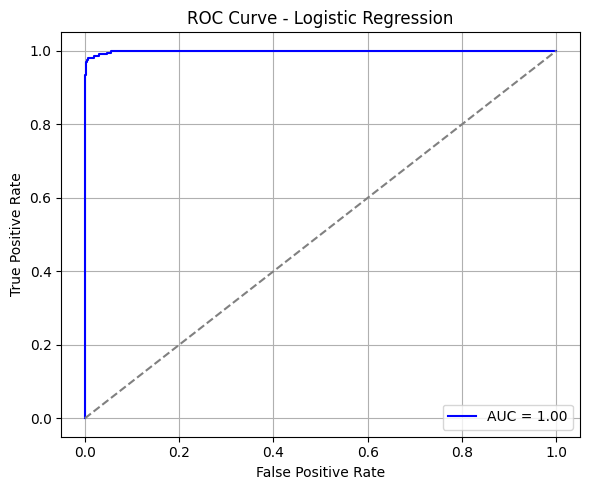

In [34]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
auc_log = roc_auc_score(y_test, log_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f"AUC = {auc_log:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
lda_preds = lda_model.predict(X_test_scaled)
lda_probs = lda_model.predict_proba(X_test_scaled)[:, 1]

print('Linear Discriminant Analysis')
print('Accuracy:', accuracy_score(y_test, lda_preds))
print('Confusion Matrix:\n', confusion_matrix(y_test, lda_preds))

Linear Discriminant Analysis
Accuracy: 0.94
Confusion Matrix:
 [[368  36]
 [  0 196]]


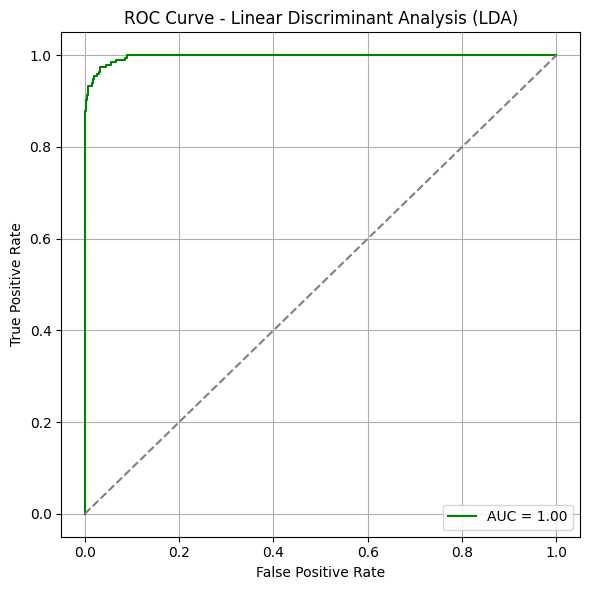

In [36]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)
auc_lda = roc_auc_score(y_test, lda_probs)

plt.figure(figsize=(6, 6))
plt.plot(fpr_lda, tpr_lda, label=f"AUC = {auc_lda:.2f}", color='green')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Linear Discriminant Analysis (LDA)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#Conclusion
Linear Regression performed better when comparing accuracies and ROC Curve
Therefore we can say linear regression is a better option for large datasets than LDA